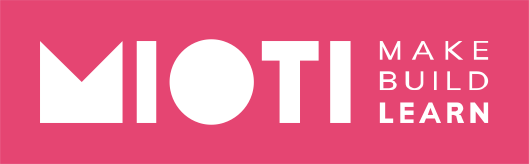

# EJEMPLOS REGRESIÓN



# Entendiendo la regresión lineal con Python


Una regresión lineal es un acercamiento para estimar la relación lineal entre dos tipos de variables, una variable de respuesta $Y$ y otra u otras variables explicativas $Xi$.  Es el modelo más usado y es una técnica fundamental a la hora de analizar datos. 

El modelo es de la forma:
## $$ y = X\beta + \epsilon $$

Donde Y es un vector n x 1, X es una matriz n x p,  β es un vector de coeficientes p x 1 y  ϵ es el término de error normal estandar. 

Normalmente a un modelo donde p = 1 lo llamamos modelo de **regresión lineal simple** y un modelo donde p > 1 lo llamamos modelo de **regresión lineal múltiple o multivariado**

Siempre que construímos un modelo habrá desviaciones entre lo que el modelo predice y lo que se observa en la muestra. La diferencia entre esos valores es conocido como los **residuales**  del modelo, que son usados para probar algunos supuestos básicos que van con la construcción del modelo. Los supuestos claves a probar son:

* *Ajuste lineal*: La suposición que la relación entre las variables son lineales
* *Homoscedasticidad*: La varianza de los datos es constante.
* *Independientes e idénticamente distribuídos*: Los resudiales de la regresión deben ser independientes e idénticamente distribuídos y no mostrar señales de correlación.
    
Utilizamos los residuales para ayudarnos a diagnosticar si la relación que estimamos es verdadera o espuria (o sea falsa)

# Regresión lineal simple
Definamos primero una función que realice la regresión y me dibuje el scatter plot con la linea de regresión. Bueno también agregar las librerías que vamos a utilizar

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd

In [7]:
def reglin(x, y):
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    B0 = model.params[0]
    B1 = model.params[1]
    x = x[:, 1]
    
    # Returna el summary y la grafica
    x2 = np.linspace(x.min(), x.max(), 100)
    y_hat = x2 * B1 + B0
    plt.scatter(x, y, alpha=1) #grafica el scatter plot
    plt.plot(x2, y_hat, 'r', alpha=1) # la linea de regresion en rojo
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model, B0, B1
    

Creamos datos e invocamos nuestra función con los datos.

Linea de mejor ajuste: Y = 9.90876091150323 + 0.504320449700668*X


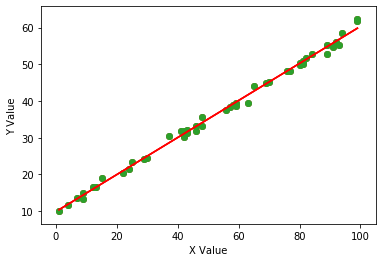

In [9]:
# Creamos los datos
n = 50
x = np.random.randint(0, 100, n)
e = np.random.normal(0, 1, n)

y = 10 + 0.5 * x + e

# invocamos la función
reglin(x, y)
print("Linea de mejor ajuste: Y = {0} + {1}*X".format(reglin(x,y)[1], reglin(x,y)[2]))


Este ejemplo tiene algún grado de ruido, pero todos los datos en la vida real tendrán ruido. Esto es inherente en el muestreo de cualquier tipo de proceso generador de datos natural. Como resultado, nuestra línea de mejor ajuste nunca se ajustará perfectamente a los datos (por eso hablamos del mejor ajuste y no elajuste perfecto). Si tuviéramos un modelo que se ajuste a cada observación es una señal de sobre-ajuste u overfitting.

Para todos los modelos de ajuste, habrá una diferencia entre lo que el modelo predice y lo que se observa, ahí es donde los residuales entran en escena.

## Residuales
La definición de **residuales** es la *diferencia entre los datos que se observan en la muestra y lo que se predice con el modelo de regresión*.

Así un residual $r_i$, lo expresamos como:
## $$r_i = Y_i - \hat{Y_i}$$

Donde $Y_i$ es el valor observado $Y$ y el $\hat{Y}_i$ es el valor Y predictivo. Nosotros a continuación graficaremos esas diferencias.


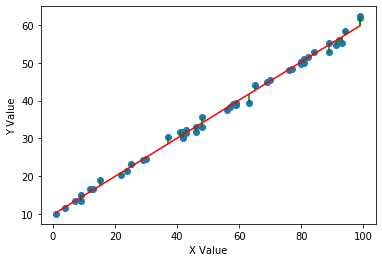

In [10]:
modelo, B0, B1 = reglin(x, y)

residuales = modelo.resid
plt.errorbar(x, y, xerr=0, yerr=[residuales, 0*residuales],linestyle="None",color='Green');

# Diagnóstico de residuales
Muchos de los supuestos necesarios para tener un modelo de regresión lineal válido se verifican a través de los patrones en los residuales.

Con una gráfica de residuales, miramos los valores predictivos del modelo vs los residuales. Lo que queremos ver es una nube de puntos que no tiene relación.

(1, 50)

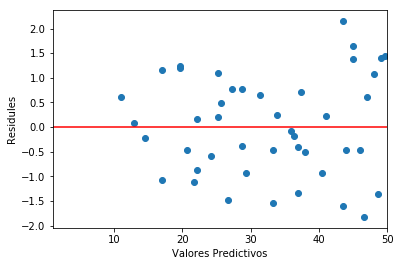

In [5]:
plt.scatter(modelo.predict(), residuales)
plt.axhline(0, color='red')
plt.xlabel('Valores Predictivos')
plt.ylabel('Residules')
plt.xlim([1,50])

Lo que nosotros buscamos es una distribución aleatoria de los residuales. Esto podría indicar que un modelo lineal   probablemente da un buen ajuste. Si nosotros vemos una tendencia, podría indicar presencia de autocorrelación o heteroscedasticidad en el modelo.

## Heteroscedasticidad
Uno de los principales supuestos detrás del modelo de regresión lineal es sobre la varianza constante en los datos, si la varianza es diferente en una parte de los datos a otra parte es posible que el modelo lineal no sea la mejor opción.

Heteroscedasticidad es el término para nombrar el fenómeno de varianza no constante. Heteroscedasticidad significativa invalida los resultados por un sesgo en el error estandar del modelo. como resultado no podríamos confiar en el resultado de la significancia del test y el intervalo de confianza generado por el modelo y sus parámetros.

Para evitar esas consecuenscias es importante graficar los residuales.

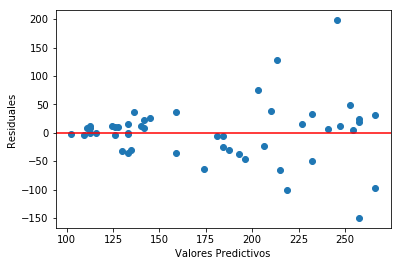

In [6]:
n = 50
x = np.random.randint(0, 100, n)
e = np.random.normal(0, 1, n)
Y_heteroscedastico = 100 + 2*x + e*x

modelo = sm.OLS(Y_heteroscedastico, sm.add_constant(x)).fit()
B0, B1 = modelo.params
residuales = modelo.resid

plt.scatter(modelo.predict(), residuales)
plt.axhline(0, color='red')
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales');

## Método estadístico para detectar heteroscedasticidad
Usualmente nosotros además de comprobar heteroscedasticidad visualmente, también la queremos comprobar estadísticamente para confirmar lo que creemos.

Un Test muy común para probar la presencia de heteroscedasticidad es la prueba de hipótesis Breusch-Pagan, también podemos utilizar el test de White pero por ahora vamos a utilizar el test de Breush-Pagan.

In [7]:
breusch_pagan_p = smd.het_breuschpagan(modelo.resid, modelo.model.exog)[1]
print(breusch_pagan_p)
if breusch_pagan_p > 0.05:
    print('La relación no es heteroscedástica')
if breusch_pagan_p < 0.05:
    print('La relación es heteroscedástica')

0.00534368373834
La relación es heteroscedástica


Nosotros establecimos un intervalo de confianza de $\alpha = 0.05$ Un p-valor abajo de nos dice que la relación es heteroscedástica. Usando una prueba de hipótesis se puede caer en el riesgo de falso positivo o falso negativo, si hay dudas es mejor hacer otros test para confirmar.

## Autocorrelación
Otro de los supuestos detrás del modelo de regresión lineal es que los residuales no tienen autocorrelación seriál. Una serie está autocorrelacionada cuando tiene correlación con su serie rezagada. Por ejemplo las series financieras en su gran mayoría tienen autocorrelación serial. 

## $$ Y_i = Y_{i-1} + \epsilon$$


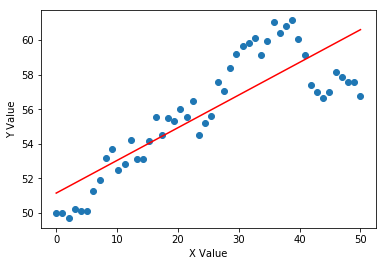

In [8]:
n = 50
x2 = np.linspace(0, n, n)
Y_autocorrelacionado = np.zeros(n)
Y_autocorrelacionado[0] = 50
for t in range(1, n):
    Y_autocorrelacionado[t] = Y_autocorrelacionado[t-1] + np.random.normal(0,1)
   
modelo2, B02, B12 = reglin(x2, Y_autocorrelacionado)


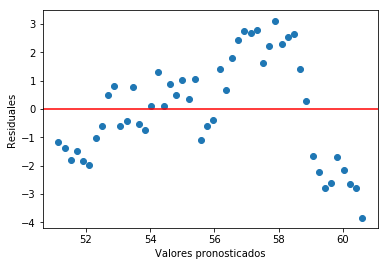

In [9]:
residuales = modelo2.resid

plt.scatter(modelo2.predict(), residuales)
plt.axhline(0, color='red')
plt.xlabel('Valores pronosticados')
plt.ylabel('Residuales');

La autocorrelación como tal no es muy obvia en cuando se grafica y es mucho más confiable realizar una prueba estadística.

## Método estadístico para detectar autocorrelación

Como todos las propiedades estadísticas, es necesario probar como instancia definitiva un test estadístico para decidir si hay autocorrelación en los residuales o no. Para este proposito usaremos el test Ljung-Box.

Este Test es usado para detectar autocorrelación in series de tiempo y examina la autocorrelación en todos los rezagos abajo del máximo que se especificó y retorna una arrays con los resultados para cada intervalo de rezago.

In [10]:
ljung_box = smd.acorr_ljungbox(residuales, lags = 10)

if any(ljung_box[1] < 0.05):
    print("Los residuales están autocorrelacionados")
else:
    print("Los residuales no están autocorrelacionados")

Los residuales están autocorrelacionados
